# Lab 3: Stochastic Gradient Descent

The goal of this lab session is to code an optimization algorithm that optimzes the penalized loss function of the logistic regression model.

You have to send the filled notebook named **"L3_familyname1_familyname2.ipynb"** (groups of 2) by email to aml.centralesupelec.2019@gmail.com by October 17, 2019. Please put **"AML-L3"** in the subject. 

We begin with the standard imports:

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

We import the dataset that we are going to use, an indian dataset including in the last column information about the diabetes status of patients:

In [107]:
from sklearn import model_selection

diabetes_data = pd.read_csv("diabetes_data.csv", sep=",")

diabetes_train, diabetes_test = model_selection.train_test_split(diabetes_data)
diabetes_train_x = diabetes_train.iloc[:, :-1].values
diabetes_train_y = diabetes_train.iloc[:, -1].values
diabetes_train_y[diabetes_train_y == 0] = -1

diabetes_test_x = diabetes_test.iloc[:, :-1].values
diabetes_test_y = diabetes_test.iloc[:, -1].values
diabetes_test_y[diabetes_test_y == 0] = -1

## Logistic Regression



Today we’ll be moving from linear regression to logistic regression, one of the simplest ways to deal with a classification problem. Instead of fitting a line, logistic regression models the probability that the outcome is 1 given the value of the predictor. In order to do this we need a function that transforms our predictor variable to a value between 0 and 1. Lots of functions can do that, but the logistic function is the most common choice:

$$f(z) = \frac{1}{1+\exp{-z}}.$$

To predict the class of our observations we'll have to minimize the corresponding loss function and as we are in a high-dimensional context we'll add an $l_2$ regularization to the model:

$$L(\textbf{w}) = \sum_{i=1}^n log(1+\exp(-y_i\textbf{w}^Tx_i))+\frac{\lambda}{2} \| \textbf{w} \|^2,$$

where $x_i$ is the vector of features for the observation $i$ and $y_i \in \{-1, 1\}$ is the class label.  


We first use the `sklearn` implementation:

In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty="l2", C=2) 
model.fit(diabetes_train_x, diabetes_train_y)
y_pred = model.predict(diabetes_test_x)

/home/hrami/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


and we compute the accuracy score to evaluate the model performance:

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(diabetes_test_y, y_pred)

0.6979166666666666

In [110]:
X=diabetes_train_x
Y=diabetes_train_y

In [111]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

### Assignment

Implement from scratch your own logistic regression model with stochastic gradient descent optimization. 

- Fill in the class

- Display the evolution of the cost function along iterations. Do this for several strategies for the setting of the learning rate

- Try the different acceleration strategies

- Train the model with the training set and evaluate its performance in the test set

In the next section we'll implement the Gradient descent (The cost function include all the points)

In [112]:
class LogisticRegression_GD():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    bsize: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self):
        self.coef_  = None
        self.lr_     = None
        self.bsize_  = None
        self.coef_history_ = []
        self.f_history_ = []

    def logistic(self, z):
        # logistic function
        return(1/(1+np.exp(-z)))
    def fit(self, X, y, lr=1.5e-07,  max_iter=5000,alpha=2):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """        
        #alpha=self.alpha_
        w= np.random.rand(np.shape(X)[1],1)
        def f_lr(beta):
            '''evaluate the Cost Function'''
            return(np.sum(np.log(1+np.exp(-y*np.dot(X,beta))))+ 0.5* alpha* (np.linalg.norm(beta)**2))
        def grad(X,y,w):
            dw=0
            for i in range (575):
                ex=np.exp(-y[i]*np.dot(w.T,X[:,i]))
                fi=-y[i]*ex/(1+ex)*X[:,i] 
                dw+=fi
            dw=dw.reshape(w.shape)
            dw+=w
            return dw
        for i in range(max_iter):
            self.f_history_.append(f_lr(w))
            self.coef_history_.append(w)
            grad_F= grad(X.T,y,w)
            w=w- lr * grad_F
        self.coef_= w

            
         
    def predict(self, X):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        return(np.sign(np.dot(X,self.coef_)))

In [113]:
model=LogisticRegression_GD()
model.fit(X,Y)

GD -training accuracy 0.6939130434782609
GD -testing accuracy 0.6197916666666666


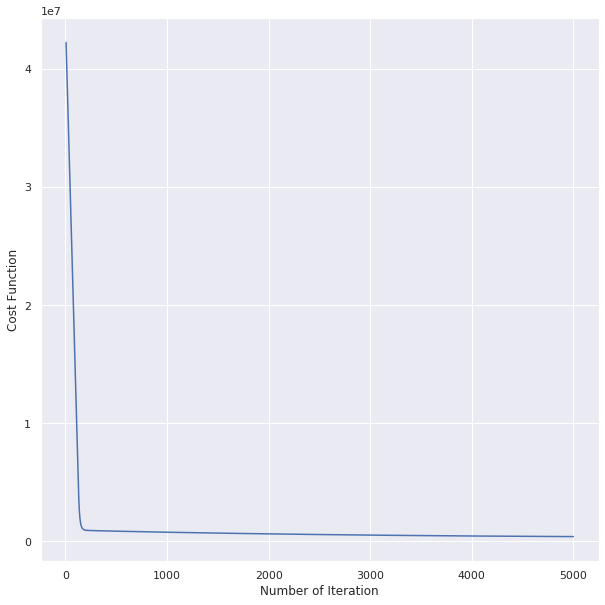

In [114]:
y_pred= model.predict(X)
print('GD -training accuracy',accuracy_score(Y, y_pred))
y_pred= model.predict(diabetes_test_x)
print('GD -testing accuracy',accuracy_score(diabetes_test_y, y_pred))

x = np.arange(5000)
y = model.f_history_
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost Function")
plt.show()

### Influence of alpha

The regularization parameter reduces the variance of the estimated regression parameters. But, there is a bias that is added to the estimate.

In [46]:
histories=[]
for alpha in [0.1,0.5,1,1.5,2]:
    model=LogisticRegression_GD()
    model.fit(X,Y,alpha=alpha)
    y_pred= model.predict(X)
    print('GD -training accuracy - alpha={}'.format(alpha),accuracy_score(Y, y_pred))
    y_pred= model.predict(diabetes_test_x)
    print('GD -testing accuracy- alpha={}'.format(alpha),accuracy_score(diabetes_test_y, y_pred))
    histories.append(model.f_history_)

GD -training accuracy - alpha=0.1 0.6521739130434783
GD -testing accuracy- alpha=0.1 0.640625
GD -training accuracy - alpha=0.5 0.6034782608695652
GD -testing accuracy- alpha=0.5 0.5833333333333334
GD -training accuracy - alpha=1 0.5826086956521739
GD -testing accuracy- alpha=1 0.5520833333333334
GD -training accuracy - alpha=1.5 0.5634782608695652
GD -testing accuracy- alpha=1.5 0.5104166666666666
GD -training accuracy - alpha=2 0.5895652173913043
GD -testing accuracy- alpha=2 0.5625


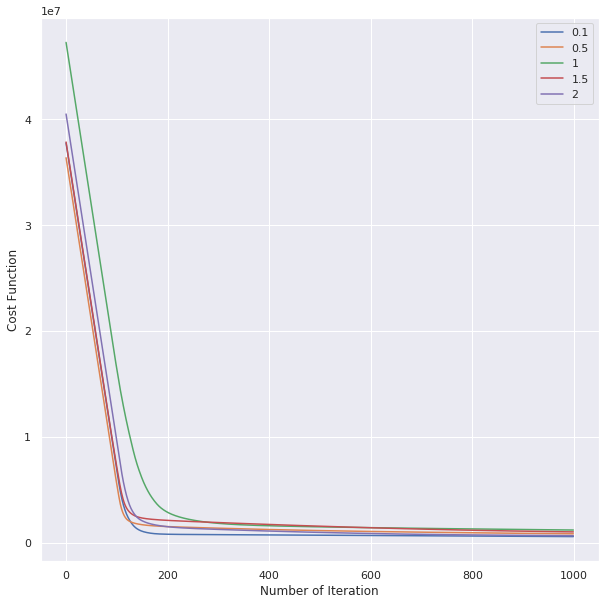

In [48]:
alphas=[0.1,0.5,1,1.5,2]
plt.figure(figsize=(10,10))
for i in range(len(histories)):
    x = np.arange(1000)
    y = histories[i]
    plt.plot(x, y,label='{}'.format(alphas[i]))
    plt.legend()
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost Function")
plt.show()

In the next section, we'll implement the Stochastic Gradient Descent (Only one element in the cost function)

In [56]:
class StochasticLogisticRegression():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    bsize: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self, alpha=0.2):
        self.coef_  = None
        self.alpha_ = alpha
        self.lr_     = None
        self.bsize_  = None
        self.coef_history_ = []
        self.f_history_ = []

    def logistic(self, z):
        # logistic function
        return(1/(1+np.exp(-z)))
    def fit(self, X, y, lr=1.5e-04,  max_iter=10000):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """        
        alpha=self.alpha_
        w= np.random.rand(np.shape(X)[1],1)
        def f_lr(beta):
            '''evaluate the Cost Function'''
            return(np.sum(np.log(1+np.exp(-y*np.dot(X,beta))))+ 0.5* alpha* (np.linalg.norm(beta)**2))
        def grad(x,y,w):
            return(np.expand_dims(-y*(1-self.logistic(y*np.dot(x,w)))*x, axis=1) + alpha*w)
        for i in range(max_iter):
            self.f_history_.append(f_lr(w))
            for j in range(len(X)):
                self.coef_history_.append(w)
                grad_F= grad(X[j], Y[j],w)
                w=w- lr * grad_F
        self.coef_= w

            
         
    def predict(self, X):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        return(np.sign(np.dot(X,self.coef_)))

training accuracy 0.6504347826086957
testing accuracy 0.6458333333333334


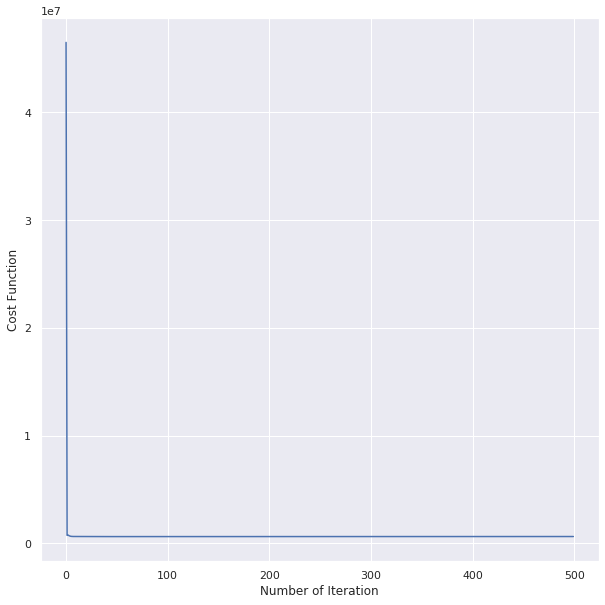

In [59]:
model=StochasticLogisticRegression()
max_iter=500
model.fit(X,Y, max_iter=max_iter)
model.predict(X)
y_pred= model.predict(X)
print('training accuracy',accuracy_score(Y, y_pred))
y_pred= model.predict(diabetes_test_x)
print('testing accuracy',accuracy_score(diabetes_test_y, y_pred))

x = np.arange(max_iter)
y = model.f_history_
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost Function")
plt.show()

The algorithm need less iterations to converge, but the accuracy is slightly lower than the accuracy of the GD.


Now we will try the averaging method and choose lr=C*t**(-1)

In [115]:
class StochasticLogisticRegression_averaging():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    bsize: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self, alpha=0.2):
        self.coef_  = None
        self.alpha_ = alpha
        self.lr_     = None
        self.bsize_  = None
        self.coef_history_ = []
        self.f_history_ = []

    def logistic(self, z):
        # logistic function
        return(1/(1+np.exp(-z)))
    def fit(self, X, y, lr=0.1,  max_iter=10000):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """        
        alpha=self.alpha_
        w= np.random.rand(np.shape(X)[1],1)
        def f_lr(beta):
            '''evaluate the Cost Function'''
            return(np.sum(np.log(1+np.exp(-y*np.dot(X,beta))))+ 0.5* alpha* (np.linalg.norm(beta)**2))
        def grad(x,y,w):
            return(np.expand_dims(-y*(1-self.logistic(y*np.dot(x,w)))*x, axis=1) + alpha*w)
        for i in range(max_iter):
            ws=[]
            self.f_history_.append(f_lr(w))
            for j in range(len(X)):
                self.coef_history_.append(w)
                grad_F= grad(X[j], Y[j],w)
                w=w- lr* (i+1)**(-1) * grad_F
                ws.append(w)
            w=np.array(ws).mean(axis=0)
            self.coef_history_.append(w)
        self.coef_= w

            
         
    def predict(self, X):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        return(np.sign(np.dot(X,self.coef_)))

training accuracy 0.7234782608695652
testing accuracy 0.6145833333333334


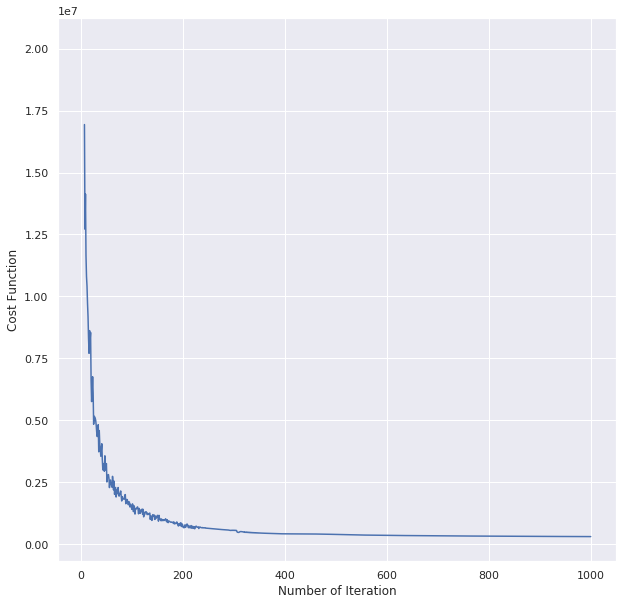

In [116]:
model=StochasticLogisticRegression_averaging()
max_iter=1000
model.fit(X,Y, max_iter=max_iter)
model.predict(X)
y_pred= model.predict(X)
print('training accuracy',accuracy_score(Y, y_pred))
y_pred= model.predict(diabetes_test_x)
print('testing accuracy',accuracy_score(diabetes_test_y, y_pred))

x = np.arange(max_iter)
y = model.f_history_
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.xlabel("Number of Iteration")
plt.ylabel("Cost Function")
plt.show()

We can notice that the cost oscilate over iteration until the learning rate goes under some treshold

In the next section, we'll implement the Batch Gradient Descent (Batch of ponits are used in the cost function)

In [117]:
class BatchLogisticRegression():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    bsize: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self, alpha=0.2):
        self.coef_  = None
        self.alpha_ = alpha
        self.lr_     = None
        self.bsize_  = None
        self.coef_history_ = []
        self.f_history_ = []

    def logistic(self, z):
        # logistic function
        return(1/(1+np.exp(-z)))
    def fit(self, X, y, lr=1.5e-06, bsize=25,  max_iter=10000):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """        
        alpha=self.alpha_
        w= np.random.rand(np.shape(X)[1],1)
        def f_lr(beta):
            '''evaluate the Cost Function'''
            return(np.sum(np.log(1+np.exp(-y*np.dot(X,beta))))+ 0.5* alpha* (np.linalg.norm(beta)**2))
        def grad(X,y,w,bsize=bsize):
            dw=0
            for i in range (bsize):
                ex=np.exp(-y[i]*np.dot(w.T,X[:,i]))
                fi=-y[i]*ex/(1+ex)*X[:,i] 
                dw+=fi
            dw=dw.reshape(w.shape)
            dw+=w
            return dw
        for i in range(max_iter):
            self.f_history_.append(f_lr(w))
            for j in range( len(X)//bsize ):
                self.coef_history_.append(w)
                grad_F= grad((X.T[:,j*bsize: (j+1)*bsize]), Y[j*bsize: (j+1)*bsize],w)
                w=w- lr * grad_F
        self.coef_= w

            
         
    def predict(self, X):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        return(np.sign(np.dot(X,self.coef_)))

training accuracy 0.7078260869565217
testing accuracy 0.6614583333333334
training accuracy 0.6921739130434783
testing accuracy 0.671875


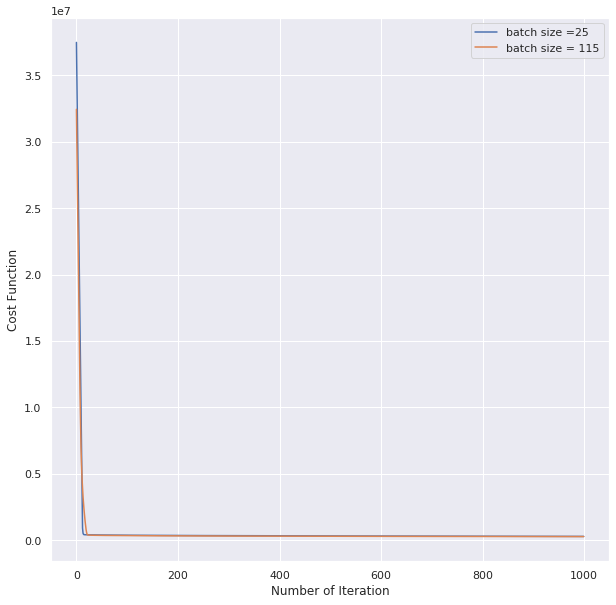

In [74]:
plt.figure(figsize=(10,10))
model=BatchLogisticRegression()
max_iter=1000
model.fit(X,Y, max_iter=max_iter)
model.predict(X)
y_pred= model.predict(X)
print('training accuracy',accuracy_score(Y, y_pred))
y_pred= model.predict(diabetes_test_x)
print('testing accuracy',accuracy_score(diabetes_test_y, y_pred))

x = np.arange(max_iter)
y = model.f_history_
plt.plot(x, y, label="batch size =25")

model=BatchLogisticRegression()
max_iter=1000
x = np.arange(max_iter)
model.fit(X,Y, bsize=115 , max_iter = max_iter)
y_pred= model.predict(X)
print('training accuracy',accuracy_score(Y, y_pred))
y_pred= model.predict(diabetes_test_x)
print('testing accuracy',accuracy_score(diabetes_test_y, y_pred))
y1 = model.f_history_
plt.plot(x, y1, label="batch size = 115")
plt.xlabel("Number of Iteration")
plt.ylabel("Cost Function")
plt.legend()
plt.show()

we can notice that smaller the batch size the more quickly the algorithm converges

In the next section, we will implement a Batch Gradient Descent with Momentum

In [119]:
class MomentumLogisticRegression():
    """ Class for logistic regression:
    
    Attributes:
    -----------
    coef_: 1-dimensional np.array
        coefficients 
    alpha_: float
        regularization parameter
    lr_: float
        the learning rate
    bsize: integer
        the size of the mini-batch >=1
    coef_history_: list
        the list of all visited betas
    f_history_: list 
        the list of all evaluations in visited betas
    """
    def __init__(self, alpha=0.2, theta=0.01):
        self.coef_  = None
        self.alpha_ = alpha
        self.theta_ = theta
        self.lr_     = None
        self.bsize_  = None
        self.coef_history_ = []
        self.f_history_ = []

    def logistic(self, z):
        # logistic function
        return(1/(1+np.exp(-z)))
    def fit(self, X, y, lr=1.5e-06, bsize=25,  max_iter=10000):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """        
        alpha=self.alpha_
        w= np.random.rand(np.shape(X)[1],1)
        w0=w
        def f_lr(beta):
            '''evaluate the Cost Function'''
            return(np.sum(np.log(1+np.exp(-y*np.dot(X,beta))))+ 0.5* alpha* (np.linalg.norm(beta)**2))
        def grad(X,y,w,bsize=bsize):
            dw=0
            for i in range (bsize):
                ex=np.exp(-y[i]*np.dot(w.T,X[:,i]))
                fi=-y[i]*ex/(1+ex)*X[:,i] 
                dw+=fi
            dw=dw.reshape(w.shape)
            dw+=w
            return dw
        for i in range(max_iter):
            self.f_history_.append(f_lr(w))
            for j in range( len(X)//bsize ):
                self.coef_history_.append(w)
                grad_F= grad((X.T[:,j*bsize: (j+1)*bsize]), Y[j*bsize: (j+1)*bsize],w)
                w1=w- lr * grad_F + self.theta_* (w-w0)
                w0=w
                w=w1
        self.coef_= w

            
         
    def predict(self, X):
        """ Make binary predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions (0 or 1)
        """
        return(np.sign(np.dot(X,self.coef_)))

training accuracy 0.697391304347826
testing accuracy 0.5885416666666666


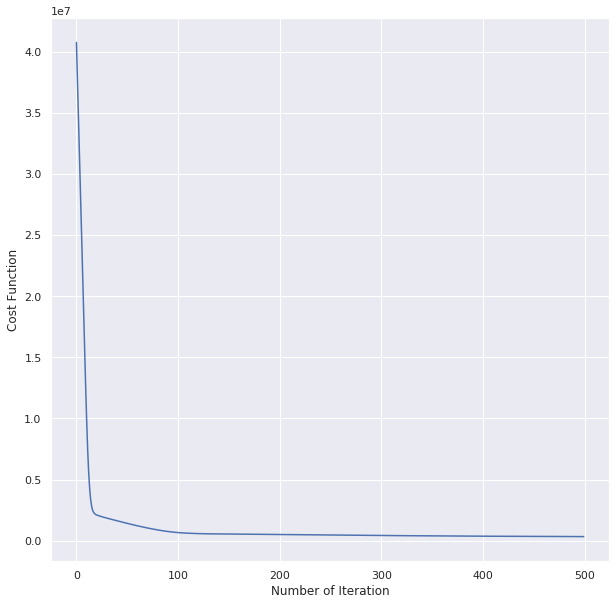

In [121]:
model=MomentumLogisticRegression()
max_iter=500
model.fit(X,Y, max_iter=max_iter)
model.predict(X)
y_pred= model.predict(X)
print('training accuracy',accuracy_score(Y, y_pred))
y_pred= model.predict(diabetes_test_x)
print('testing accuracy',accuracy_score(diabetes_test_y, y_pred))
plt.figure(figsize=(10,10))
x = np.arange(max_iter)
y = model.f_history_
plt.plot(x, y, label="batch size =25")
plt.xlabel("Number of Iteration")
plt.ylabel("Cost Function")
plt.show()

The GD with Momentum converge very quickly and the cost function decrease constantly without oscillation. 